In [40]:
pip install tensorflow==2.18.0


  Using cached keras-3.8.0-py3-none-any.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install keras==3.7.0

  Using cached keras-3.7.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install optree
# A package that helps in optimization

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install keras==3.7.0

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.applications.vgg16 import VGG16
# used for feature extraction.
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 # Helps in image augmentation and loading datasets.
from keras.models import Model        
from keras.models import Sequential
#defining the deep learning model
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
#Used for plotting training results.

In [ ]:
IMAGE_SIZE = [224, 224]
# Required input size for VGG16

In [49]:
train_directory='D:/face morphing/Dataset/datasets/train/'
test_directory='D:/face morphing/Dataset/datasets/test/'
val_directory='D:/face morphing/Dataset/datasets/valid/'

In [ ]:


 
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  #This freezes all VGG16 layers so that they do not change during training.

In [51]:
  # useful for getting number of classes
folders = glob('D:/face morphing/Dataset/datasets/valid/*')
len(folders)

2

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
#Converts VGG16 output into a 1D array
prediction = Dense(len(folders), activation='softmax')(x)
#len(folders)' determines the number of classes

In [ ]:
# Create the final model object by defining inputs (VGG16 input) and outputs (custom classification layer)
model = Model(inputs=vgg.input, outputs=prediction)

# Display the complete architecture of the model, including layers and parameters
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Compile the model before training
# 'categorical_crossentropy' is used as the loss function for multi-class classification
# 'adam' optimizer adjusts weights to minimize loss and improve accuracy
# 'accuracy' is used as a performance metric to evaluate how well the model classifies images
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data augmentation for training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
# Rescale test set images (no augmentation)
test_datagen = ImageDataGenerator(rescale = 1./255)
# Load training images from directory and preprocess
training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
# Load test images from directory and preprocess
test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1371 images belonging to 2 classes.
Found 1371 images belonging to 2 classes.


In [56]:
print(len(training_set))
print(len(test_set))

43
43


In [ ]:
import scipy
#provides scientific computing functions and imports the linear Algebra
from scipy import linalg
print(linalg.__doc__)



Linear algebra (:mod:`scipy.linalg`)

.. currentmodule:: scipy.linalg

.. toctree::
   :hidden:

   linalg.blas
   linalg.cython_blas
   linalg.cython_lapack
   linalg.interpolative
   linalg.lapack

Linear algebra functions.

.. eventually, we should replace the numpy.linalg HTML link with just `numpy.linalg`

.. seealso::

   `numpy.linalg <https://www.numpy.org/devdocs/reference/routines.linalg.html>`__
   for more linear algebra functions. Note that
   although `scipy.linalg` imports most of them, identically named
   functions from `scipy.linalg` may offer more or slightly differing
   functionality.


Basics

.. autosummary::
   :toctree: generated/

   inv - Find the inverse of a square matrix
   solve - Solve a linear system of equations
   solve_banded - Solve a banded linear system
   solveh_banded - Solve a Hermitian or symmetric banded system
   solve_circulant - Solve a circulant system
   solve_triangular - Solve a triangular matrix
   solve_toeplitz - Solve a toeplitz m

In [ ]:
from scipy import ndimage
# image processing functions like filtering, interpolation, and transformations.
from scipy import linalg
print(ndimage.__doc__)



Multidimensional image processing (:mod:`scipy.ndimage`)

.. currentmodule:: scipy.ndimage

This package contains various functions for multidimensional image
processing.


Filters

.. autosummary::
   :toctree: generated/

   convolve - Multidimensional convolution
   convolve1d - 1-D convolution along the given axis
   correlate - Multidimensional correlation
   correlate1d - 1-D correlation along the given axis
   gaussian_filter
   gaussian_filter1d
   gaussian_gradient_magnitude
   gaussian_laplace
   generic_filter - Multidimensional filter using a given function
   generic_filter1d - 1-D generic filter along the given axis
   generic_gradient_magnitude
   generic_laplace
   laplace - N-D Laplace filter based on approximate second derivatives
   maximum_filter
   maximum_filter1d
   median_filter - Calculates a multidimensional median filter
   minimum_filter
   minimum_filter1d
   percentile_filter - Calculates a multidimensional percentile filter
   prewitt
   rank_filter - Ca

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with rescaling and validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load and preprocess training dataset (80% of the data)
train_dataset = datagen.flow_from_directory(
    "D:/face morphing/Dataset/datasets/train/",
    target_size=(224, 224), 
    batch_size=32,          
    class_mode='categorical', 
    subset="training"        
)

# Load and preprocess validation dataset (20% of the data)
validation_dataset = datagen.flow_from_directory(
    "D:/face morphing/Dataset/datasets/valid/",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset="validation"  
)


Found 1097 images belonging to 2 classes.
Found 274 images belonging to 2 classes.


In [ ]:
# Train the model using the training dataset
r=model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=5 # Number of training cycles
)


Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 211s 6s/step - accuracy: 0.8076 - loss: 0.6303 - val_accuracy: 0.9818 - val_loss: 0.0312
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 200s 6s/step - accuracy: 0.9978 - loss: 0.0122 - val_accuracy: 0.9927 - val_loss: 0.0231
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 203s 6s/step - accuracy: 0.9963 - loss: 0.0064 - val_accuracy: 0.9854 - val_loss: 0.0170
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 197s 6s/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9927 - val_loss: 0.0151
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 209s 6s/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9927 - val_loss: 0.0132


In [ ]:
model.save("face_morph_detection.h5")
# Save the trained model to a file

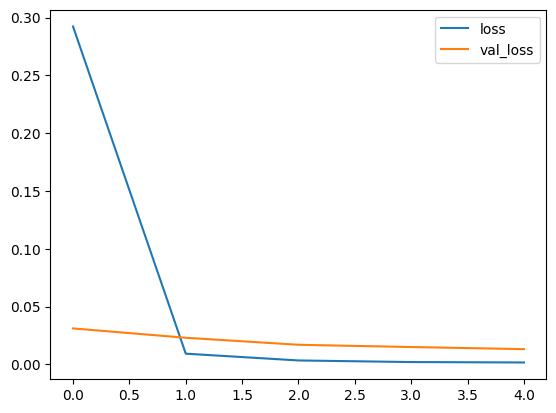

In [64]:
# loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

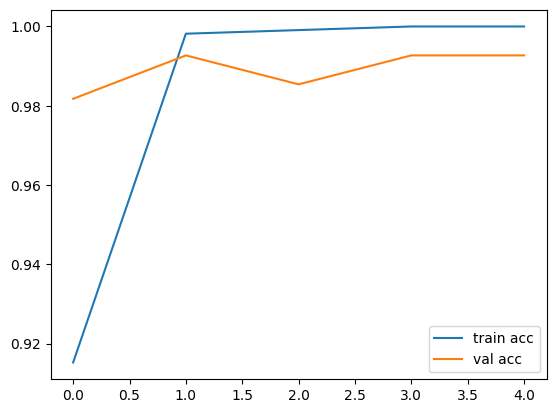

In [ ]:
# accuracies
# Import matplotlib for visualization
import matplotlib.pyplot as plt
# Plot training and validation accuracy over epochs
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [66]:
import tensorflow as tf
import keras as k
print(tf.__version__)
print(k.__version__)

2.18.0
3.7.0


In [ ]:
pip install pandas 
#data analysis

Note: you may need to restart the kernel to use updated packages.


Found 1097 images belonging to 2 classes.
Found 274 images belonging to 2 classes.
Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 36s 985ms/step - accuracy: 0.7290 - loss: 1.6784 - val_accuracy: 0.9781 - val_loss: 0.0540
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 32s 897ms/step - accuracy: 0.9969 - loss: 0.0161 - val_accuracy: 0.9964 - val_loss: 0.0147
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 33s 947ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.9964 - val_loss: 0.0152
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 34s 956ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9964 - val_loss: 0.0133
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 33s 940ms/step - accuracy: 1.0000 - loss: 5.1764e-04 - val_accuracy: 0.9927 - val_loss: 0.0142
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 31s 888ms/step - accuracy: 1.0000 - loss: 1.7232e-04 - val_accuracy: 0.9927 - val_loss: 0.0148
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 33s 932ms/step - accuracy: 1.0000 - loss: 5.9241e-05 - val_accuracy: 0.9927 - val_loss: 0.0132
Ep

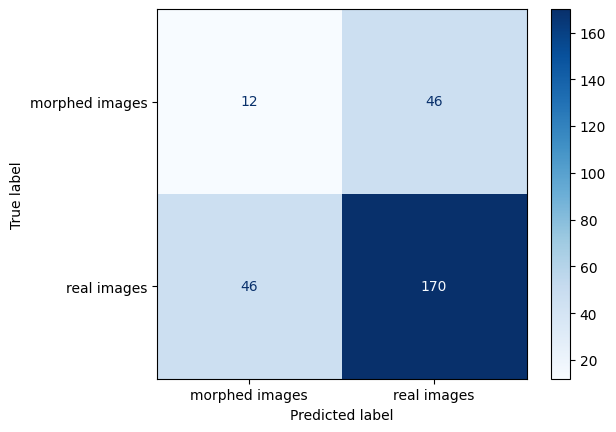

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Paths to the dataset (update according to your environment)
dataset_path ='D:/face morphing/Dataset/datasets/train/'  # Provide the path to the dataset

# Preprocessing using ImageDataGenerator for augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Loading the dataset into train and validation generators
train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Create a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),# Max pooling to reduce spatial size
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),# Fully connected layer with 128 neurons
    Dense(len(train_gen.class_indices), activation='softmax')  
    # Output layer with softmax activation for classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_gen, epochs=10, validation_data=val_gen)

# Evaluate the model on validation data
y_true = val_gen.classes  # True labels
y_pred = model.predict(val_gen, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class labels

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix using matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(train_gen.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.show()
